In [1]:
import os
import sys
import glob 
from functools import reduce
import seaborn as sb
import pandas as pd
import numpy as np
from scipy import stats
import random

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# display plots in the notebook
%matplotlib inline
# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [3]:
sys.path.append("../")
from simulation.cloud import *
from simulation.plot import *

In [4]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

---

In [22]:
cloud = Cloud(num_leafs=48,
              num_hosts_per_leaf=48,
              num_rules_per_leaf=1,
              max_vms_per_host=20,
              num_tenants=100,
              min_vms_per_tenant=10,
              max_vms_per_tenant=1000,
              vm_dist='expon',
              num_groups=1000,
              min_group_size=5,
              group_size_dist='uniform',
              placement_dist='colocate',
              colocate_num_hosts_per_leaf=20,
              num_bitmaps=5,
              max_batch_size=1)

network[leaf_to_hosts]: initialized.
network[host_to_leaf]: initialized.
tenants[vm_count]: initialized.
tenants[group_count]: initialized.
tenants[groups_to_sizes]: initialized.
tenants[groups_to_vms]: initialized.
placement[tenant_vms_to_host]: initialized.
placement[tenant_vms_to_leaf]: initialized.
placement[tenant_groups_to_leafs_and_count]: initialized.
placement[tenant_groups_leafs_to_hosts_and_bitmap]: initialized.
optimization: complete.


In [23]:
plot = Plot(plt, Data(cloud))

data: complete.


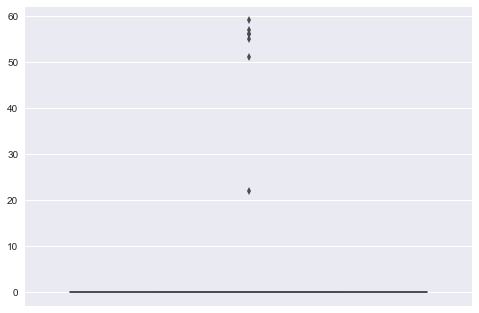

In [24]:
sb.boxplot(y=plot.data.rules_for_all_leafs)

In [25]:
plot.data.rules_for_all_leafs.describe()

count    48.000000
mean      7.416667
std      18.720603
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max      59.000000
dtype: float64

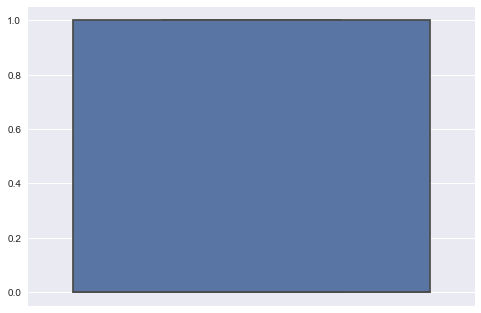

In [26]:
sb.boxplot(y=plot.data.rules_for_all_leafs_post_optimization)

In [27]:
plot.data.rules_for_all_leafs_post_optimization.describe()

count    48.000000
mean      0.354167
std       0.483321
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
dtype: float64

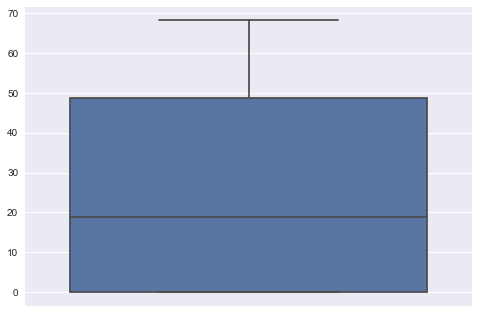

In [28]:
sb.boxplot(y=plot.data.redundancy_for_all_groups_in_all_tenants)

In [29]:
plot.data.redundancy_for_all_groups_in_all_tenants.describe()

count    82.000000
mean     25.098828
std      23.460003
min       0.000000
25%       0.000000
50%      18.911082
75%      48.618513
max      68.115942
dtype: float64